# Análise Histórica das Olimpíadas
Este projeto explora a participação e desempenho dos países nas Olimpíadas com foco no Brasil.


Importação de Bibliotecas e Dados


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('../dados/mundo_kaggle_olimpiadas_microdados.csv')

Exploração Inicial



In [3]:
dados.head()

,ano,edicao,cidade_sede,pais,delegacao,equipe,id_atleta,nome_atleta,sexo,idade,altura,peso,esporte,evento,medalha
0,1896,Summer,Athina,Australia,AUS,Australia,35698,"Edwin Harold ""Teddy"" Flack",M,22.0,NaN,NaN,Athletics,"Athletics Men's 1,500 metres",Gold
1,1896,Summer,Athina,Australia,AUS,Australia,35698,"Edwin Harold ""Teddy"" Flack",M,22.0,NaN,NaN,Athletics,Athletics Men's 800 metres,Gold
2,1896,Summer,Athina,Australia,AUS,Australia,35698,"Edwin Harold ""Teddy"" Flack",M,22.0,NaN,NaN,Athletics,Athletics Men's Marathon,NaN
3,1896,Summer,Athina,Australia,AUS,Australia/Great Britain,35698,"Edwin Harold ""Teddy"" Flack",M,22.0,NaN,NaN,Tennis,Tennis Men's Doubles,Bronze
4,1896,Summer,Athina,Australia,AUS,Australia,35698,"Edwin Harold ""Teddy"" Flack",M,22.0,NaN,NaN,Tennis,Tennis Men's Singles,NaN


In [4]:
dados.tail()

,ano,edicao,cidade_sede,pais,delegacao,equipe,id_atleta,nome_atleta,sexo,idade,altura,peso,esporte,evento,medalha
269713,2016,Summer,Rio de Janeiro,NaN,SGP,Singapore,133071,"Pei Lin ""Audrey"" Yong",F,21.0,156.0,50.0,Sailing,Sailing Women's Windsurfer,NaN
269714,2016,Summer,Rio de Janeiro,NaN,SGP,Singapore,133346,Yu Mengyu,F,26.0,166.0,50.0,Table Tennis,Table Tennis Women's Singles,NaN
269715,2016,Summer,Rio de Janeiro,NaN,SGP,Singapore,133346,Yu Mengyu,F,26.0,166.0,50.0,Table Tennis,Table Tennis Women's Team,NaN
269716,2016,Summer,Rio de Janeiro,NaN,SGP,Singapore,134826,Zhou Yihan,F,22.0,168.0,54.0,Table Tennis,Table Tennis Women's Team,NaN
269717,2016,Summer,Rio de Janeiro,NaN,TUV,Tuvalu,120422,Etimoni Timuani,M,24.0,184.0,72.0,Athletics,Athletics Men's 100 metres,NaN


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269718 entries, 0 to 269717
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ano          269718 non-null  int64  
 1   edicao       269718 non-null  object 
 2   cidade_sede  269718 non-null  object 
 3   pais         269348 non-null  object 
 4   delegacao    269718 non-null  object 
 5   equipe       269718 non-null  object 
 6   id_atleta    269718 non-null  int64  
 7   nome_atleta  269718 non-null  object 
 8   sexo         269718 non-null  object 
 9   idade        260410 non-null  float64
 10  altura       210917 non-null  float64
 11  peso         208204 non-null  float64
 12  esporte      269718 non-null  object 
 13  evento       269718 non-null  object 
 14  medalha      39772 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 30.9+ MB


In [6]:
print(dados.isnull().sum())

ano                 0
edicao              0
cidade_sede         0
pais              370
delegacao           0
equipe              0
id_atleta           0
nome_atleta         0
sexo                0
idade            9308
altura          58801
peso            61514
esporte             0
evento              0
medalha        229946
dtype: int64


In [7]:
print('Valores Duplicados', dados.duplicated().sum())

Valores Duplicados 0


Limpeza e Preparação

In [8]:
df =dados.copy()

In [ ]:
v = dados['evento'].unique()
v

In [10]:
todas_as_delacoes = dados['delegacao'].unique()
todas_as_delacoes = sorted(todas_as_delacoes)
np.array(todas_as_delacoes)

array(['AFG', 'AHO', 'ALB', 'ALG', 'AND', 'ANG', 'ANT', 'ANZ', 'ARG',
       'ARM', 'ARU', 'ASA', 'AUS', 'AUT', 'AZE', 'BAH', 'BAN', 'BAR',
       'BDI', 'BEL', 'BEN', 'BER', 'BHU', 'BIH', 'BIZ', 'BLR', 'BOH',
       'BOL', 'BOT', 'BRA', 'BRN', 'BRU', 'BUL', 'BUR', 'CAF', 'CAM',
       'CAN', 'CAY', 'CGO', 'CHA', 'CHI', 'CHN', 'CIV', 'CMR', 'COD',
       'COK', 'COL', 'COM', 'CPV', 'CRC', 'CRO', 'CRT', 'CUB', 'CYP',
       'CZE', 'DEN', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'ERI', 'ESA',
       'ESP', 'EST', 'ETH', 'EUN', 'FIJ', 'FIN', 'FRA', 'FRG', 'FSM',
       'GAB', 'GAM', 'GBR', 'GBS', 'GDR', 'GEO', 'GEQ', 'GER', 'GHA',
       'GRE', 'GRN', 'GUA', 'GUI', 'GUM', 'GUY', 'HAI', 'HKG', 'HON',
       'HUN', 'INA', 'IND', 'IOA', 'IRI', 'IRL', 'IRQ', 'ISL', 'ISR',
       'ISV', 'ITA', 'IVB', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ',
       'KIR', 'KOR', 'KOS', 'KSA', 'KUW', 'LAO', 'LAT', 'LBA', 'LBR',
       'LCA', 'LES', 'LIB', 'LIE', 'LTU', 'LUX', 'MAD', 'MAL', 'MAR',
       'MAS', 'MAW',

Número de atletas por país e ano

In [11]:
atletas_por_pais_ano = df.groupby(['ano', 'delegacao'])['id_atleta'].nunique().reset_index()
atletas_por_pais_ano.columns = ['ano', 'pais', 'num_atletas']
atletas_por_pais_ano.head(10)

,ano,pais,num_atletas
0,1896,AUS,1
1,1896,AUT,3
2,1896,DEN,3
3,1896,FRA,12
4,1896,GBR,10
5,1896,GER,19
6,1896,GRE,102
7,1896,HUN,7
8,1896,ITA,1
9,1896,SUI,3


Gráfico de evolução do Brasil

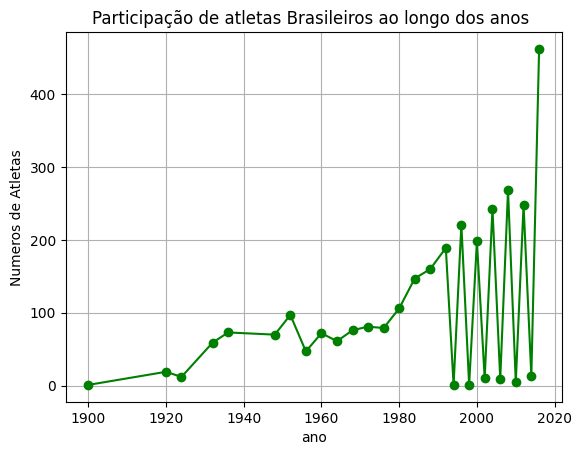

In [12]:
pais = 'BRA'
pais_especifico = atletas_por_pais_ano[atletas_por_pais_ano['pais'] =='BRA']
plt.plot(pais_especifico['ano'], pais_especifico['num_atletas'], marker='o', color='green', label='Brasil')
plt.title('Participação de atletas Brasileiros ao longo dos anos ')
plt.xlabel('ano')
plt.ylabel('Numeros de Atletas')
plt.grid(True)
plt.show()

Comparar com outro país

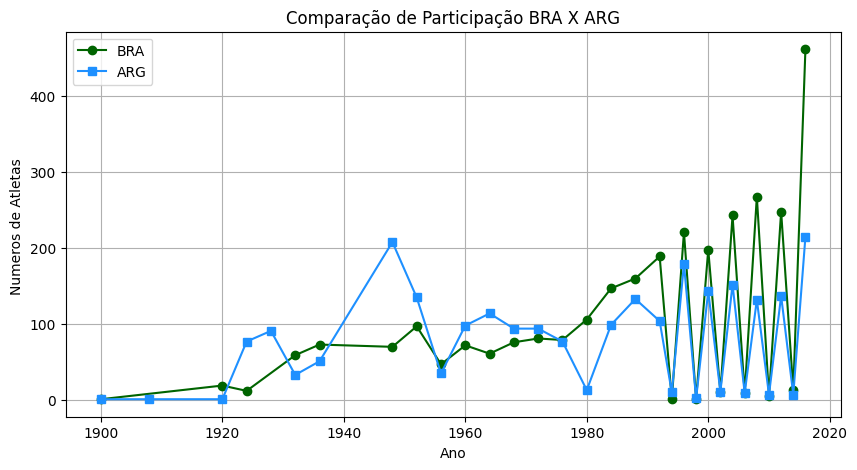

In [13]:
pais_2 = 'ARG'
pais_especifico_2 = atletas_por_pais_ano[atletas_por_pais_ano['pais'] == pais_2]

plt.figure(figsize=(10,5))
plt.plot(pais_especifico['ano'], pais_especifico['num_atletas'], marker='o', label=pais, color='darkgreen')
plt.plot(pais_especifico_2['ano'],pais_especifico_2['num_atletas'], marker='s', label=pais_2, color='dodgerblue')
plt.title(f'Comparação de Participação {pais} X {pais_2}')
plt.xlabel('Ano')
plt.ylabel('Numeros de Atletas ')
plt.legend()
plt.grid(True)
plt.show()

Esportes com mais atletas

In [14]:
atletas_por_sporte = df.groupby('esporte')['id_atleta'].nunique().sort_values(ascending=False)
atletas_por_sporte.head(10)

esporte
Athletics     22071
Swimming       8765
Rowing         7687
Football       6161
Cycling        5819
Boxing         5262
Wrestling      4988
Shooting       4882
Sailing        4480
Gymnastics     4134
Name: id_atleta, dtype: int64

Gráfico dos principais esportes

/tmp/ipykernel_78962/1537118399.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values,y=top_10.index, palette='viridis')


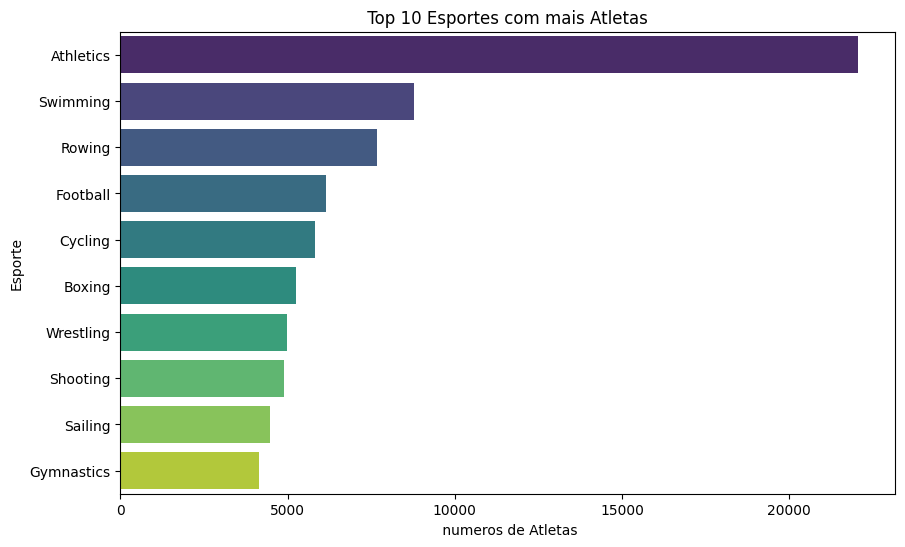

In [15]:
top_10 = atletas_por_sporte.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_10.values,y=top_10.index, palette='viridis')
plt.title(' Top 10 Esportes com mais Atletas ')
plt.xlabel(' numeros de Atletas')
plt.ylabel('Esporte')
plt.show()

Evolução da participação em um esporte

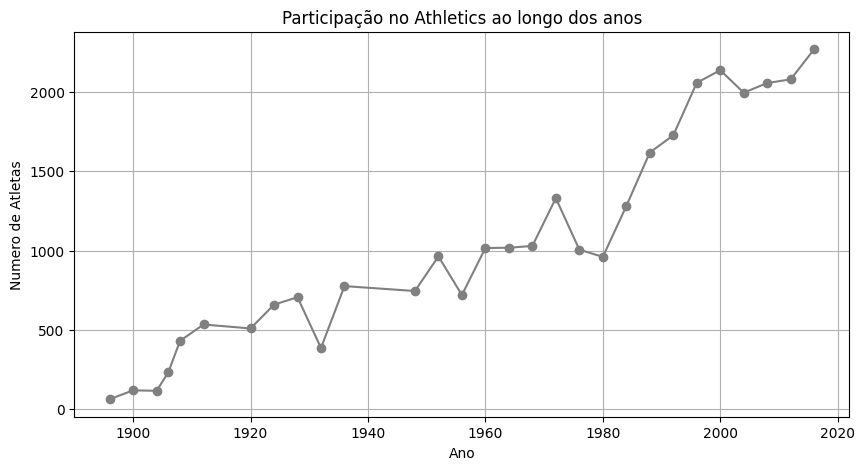

In [16]:
sporte = 'Athletics'
unico_esporte = df[df['esporte'] ==  sporte]
unico_esporte_por_ano = unico_esporte.groupby('ano')['id_atleta'].nunique().reset_index()

plt.figure(figsize=(10,5))
plt.plot(unico_esporte_por_ano['ano'], unico_esporte_por_ano['id_atleta'], marker='o', color='gray')
plt.title(f'Participação no {sporte} ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Numero de Atletas')
plt.grid(True)
plt.show()


In [17]:
unico_esporte

,ano,edicao,cidade_sede,pais,delegacao,equipe,id_atleta,nome_atleta,sexo,idade,altura,peso,esporte,evento,medalha
0,1896,Summer,Athina,Australia,AUS,Australia,35698,"Edwin Harold ""Teddy"" Flack",M,22.0,NaN,NaN,Athletics,"Athletics Men's 1,500 metres",Gold
1,1896,Summer,Athina,Australia,AUS,Australia,35698,"Edwin Harold ""Teddy"" Flack",M,22.0,NaN,NaN,Athletics,Athletics Men's 800 metres,Gold
2,1896,Summer,Athina,Australia,AUS,Australia,35698,"Edwin Harold ""Teddy"" Flack",M,22.0,NaN,NaN,Athletics,Athletics Men's Marathon,NaN
13,1896,Summer,Athina,Denmark,DEN,Denmark,54456,Alexander Viggo Jensen,M,21.0,NaN,NaN,Athletics,Athletics Men's Discus Throw,NaN
14,1896,Summer,Athina,Denmark,DEN,Denmark,54456,Alexander Viggo Jensen,M,21.0,NaN,NaN,Athletics,Athletics Men's Shot Put,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269680,2016,Summer,Rio de Janeiro,NaN,ROT,Refugee Olympic Athletes,71067,Anjelina Nadai Lohalith,F,23.0,163.0,50.0,Athletics,"Athletics Women's 1,500 metres",NaN
269681,2016,Summer,Rio de Janeiro,NaN,ROT,Refugee Olympic Athletes,71113,Rose Nathike Lokonyen,F,21.0,157.0,50.0,Athletics,Athletics Women's 800 metres,NaN
269696,2016,Summer,Rio de Janeiro,NaN,SGP,Singapore,85313,Neo Jie Shi,F,31.0,168.0,50.0,Athletics,Athletics Women's Marathon,NaN
269711,2016,Summer,Rio de Janeiro,NaN,SGP,Singapore,132637,"Jin Wei ""Timothee"" Yap",M,21.0,178.0,66.0,Athletics,Athletics Men's 100 metres,NaN


Esportes com mais medalhas

In [18]:
todas_as_medalhas = df[df['medalha'].notnull()]
medalhas_por_esporte = todas_as_medalhas['esporte'].value_counts().head(10)
medalhas_por_esporte


esporte
Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Football      1571
Ice Hockey    1530
Hockey        1528
Wrestling     1296
Cycling       1263
Name: count, dtype: int64

/tmp/ipykernel_78962/3331152048.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medalhas_por_esporte.values, y=medalhas_por_esporte.index, palette='rocket')


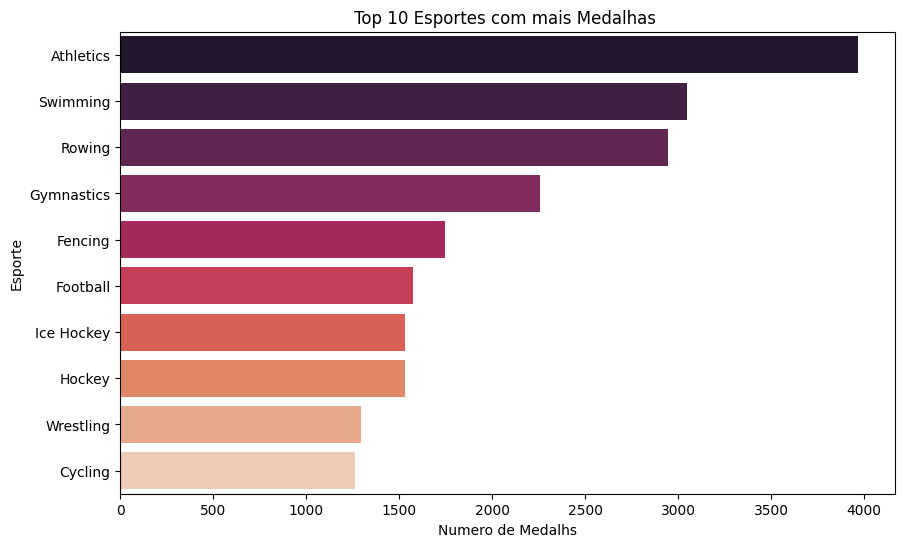

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x=medalhas_por_esporte.values, y=medalhas_por_esporte.index, palette='rocket')
plt.title('Top 10 Esportes com mais Medalhas ')
plt.xlabel('Numero de Medalhs')
plt.ylabel('Esporte')
plt.show()

Medalhas por esporte

In [20]:
tipo_medalhas = todas_as_medalhas.groupby(['esporte', 'medalha']).size().unstack().fillna(0)
tipo_medalhas.head(10)

medalha,Bronze,Gold,Silver
esporte,,,
Aeronautics,0.0,1.0,0.0
Alpine Skiing,141.0,143.0,144.0
Alpinism,0.0,25.0,0.0
Archery,98.0,135.0,120.0
Art Competitions,51.0,49.0,56.0
Athletics,1296.0,1339.0,1334.0
Badminton,60.0,54.0,54.0
Baseball,112.0,112.0,112.0
Basketball,356.0,365.0,359.0


In [21]:
ver_medalhas_pais = 'USA'
pais_medalhas = df[(df['delegacao']==ver_medalhas_pais) & (df['medalha'].notnull())]
ver_medalhas_pais_por_esporte = pais_medalhas['esporte'].value_counts()
ver_medalhas_pais_por_esporte

esporte
Athletics                    1080
Swimming                     1078
Rowing                        375
Basketball                    341
Ice Hockey                    276
Gymnastics                    194
Shooting                      193
Water Polo                    150
Diving                        140
Sailing                       140
Equestrianism                 132
Wrestling                     128
Volleyball                    120
Boxing                        113
Football                      102
Cycling                        78
Bobsleigh                      74
Speed Skating                  70
Fencing                        69
Baseball                       68
Figure Skating                 66
Tennis                         62
Softball                       60
Archery                        57
Alpine Skiing                  44
Weightlifting                  42
Short Track Speed Skating      42
Golf                           38
Rugby                          36
Synchr

/tmp/ipykernel_78962/2451175675.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ver_medalhas_pais_por_esporte.values, y=ver_medalhas_pais_por_esporte.index, palette='crest')


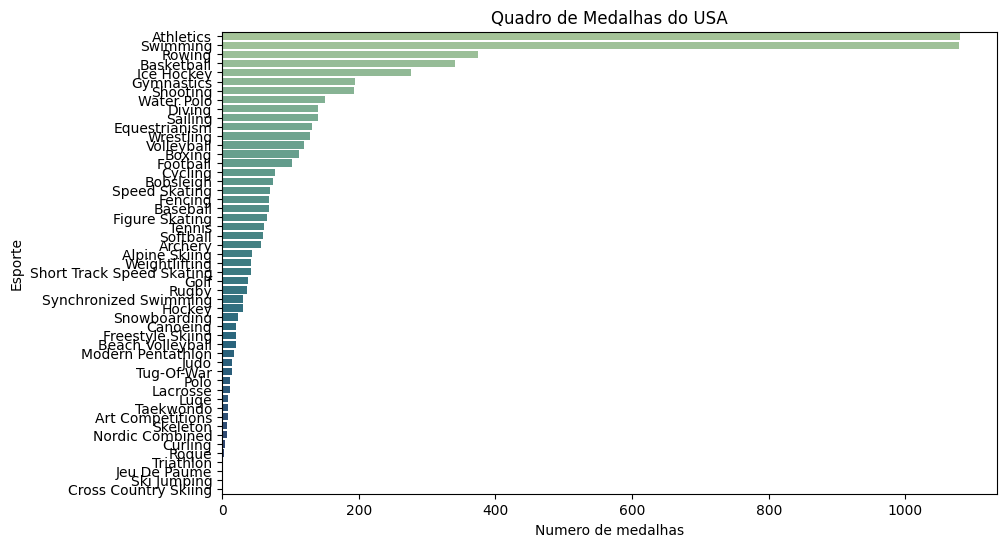

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x=ver_medalhas_pais_por_esporte.values, y=ver_medalhas_pais_por_esporte.index, palette='crest')
plt.title(f'Quadro de Medalhas do {ver_medalhas_pais}')
plt.xlabel('Numero de medalhas')
plt.ylabel('Esporte')
plt.show()

Comparar Medalhas por Esporte entre Países

In [23]:
escolha_sporte='Basketball'
escolhido_esporte = df[(df['esporte']==escolha_sporte) & (df['medalha'].notnull())]
medalhas_esporte_escolhido = escolhido_esporte['delegacao'].value_counts().head(10)
print(f'Top 10 - {escolha_sporte}')
medalhas_esporte_escolhido

Top 10 - Basketball


delegacao
USA    341
URS    146
YUG     84
ESP     60
AUS     60
BRA     58
FRA     38
RUS     36
LTU     35
ARG     24
Name: count, dtype: int64

/tmp/ipykernel_78962/2008884986.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medalhas_esporte_escolhido.values, y=medalhas_esporte_escolhido.index, palette='Reds_r')


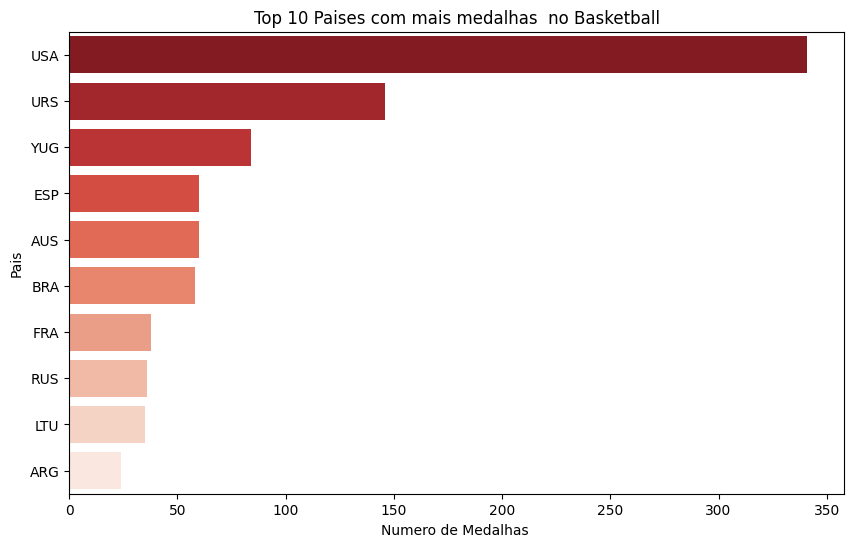

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x=medalhas_esporte_escolhido.values, y=medalhas_esporte_escolhido.index, palette='Reds_r')
plt.title(f'Top 10 Paises com mais medalhas  no {escolha_sporte}')
plt.xlabel('Numero de Medalhas ')
plt.ylabel('Pais')
plt.show()

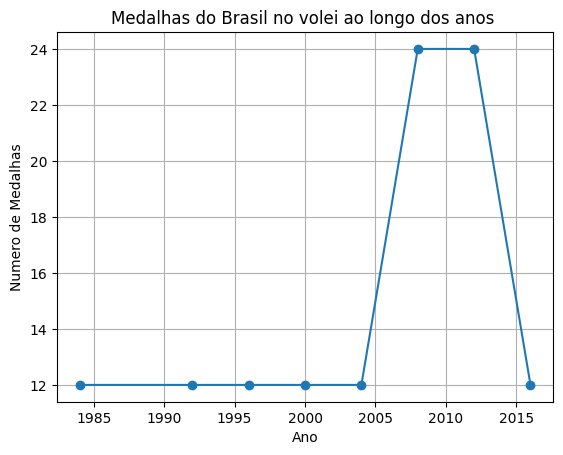

In [25]:
medalhas_pais_um_esporte =df[(df['delegacao']=='BRA') & (df['esporte'] =='Volleyball') &  (df['medalha'].notnull())]
medalhas_por_ano_esporte = medalhas_pais_um_esporte.groupby('ano')['medalha'].count().reset_index()
plt.plot(medalhas_por_ano_esporte['ano'], medalhas_por_ano_esporte['medalha'], marker='o')
plt.title('Medalhas do Brasil no volei ao longo dos anos ')
plt.xlabel('Ano')
plt.ylabel('Numero de Medalhas')
plt.grid(True)
plt.show()

Medalhas por tipo

In [26]:
todas_medalhas_pais_esporte=medalhas_pais_um_esporte.groupby('medalha').size()
print(todas_medalhas_pais_esporte)

medalha
Bronze    24
Gold      60
Silver    36
dtype: int64


/tmp/ipykernel_78962/239829287.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=todas_medalhas_pais_esporte.index, y=todas_medalhas_pais_esporte.values, palette='colorblind')


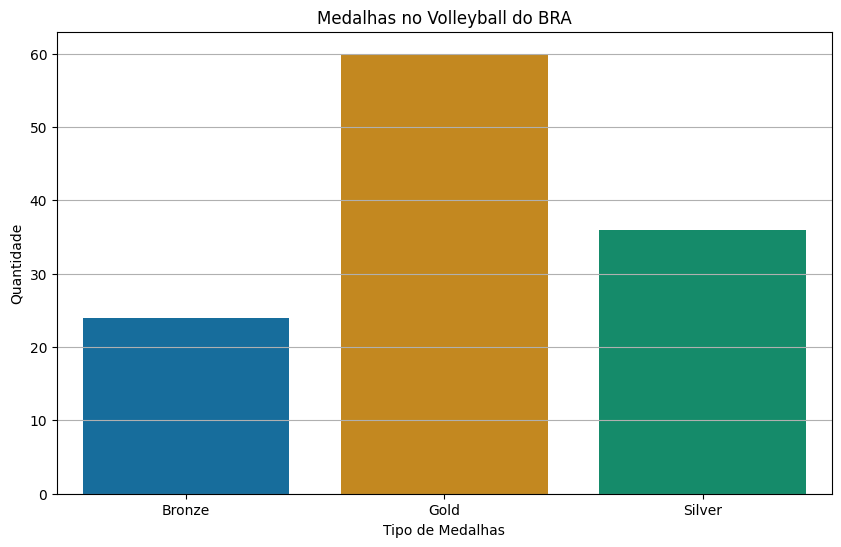

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x=todas_medalhas_pais_esporte.index, y=todas_medalhas_pais_esporte.values, palette='colorblind')
plt.title('Medalhas no Volleyball do BRA')
plt.xlabel('Tipo de Medalhas')
plt.ylabel('Quantidade')
plt.grid(True, axis='y')
plt.show()

Linha do tempo por tipo de medalha

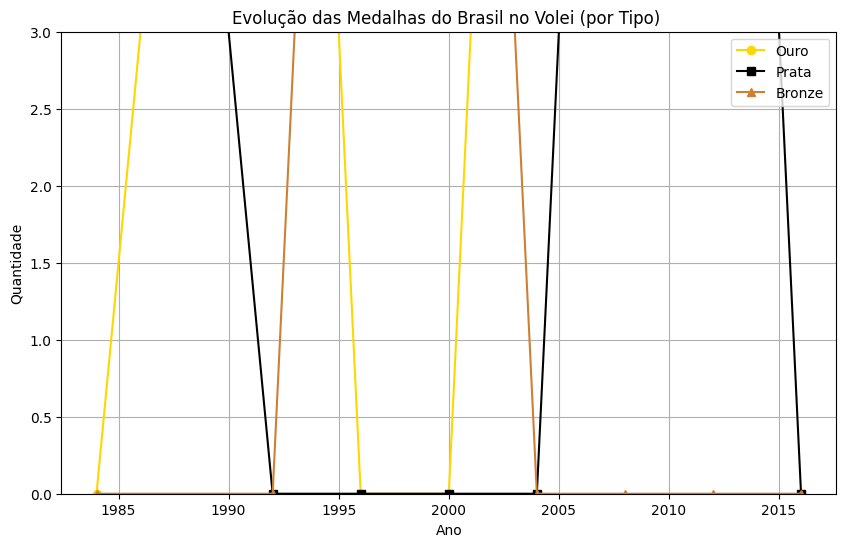

In [28]:
medalhas_pais_um_esporte_2 =df[(df['delegacao']=='BRA') & (df['esporte'] =='Volleyball') &  (df['medalha'].notnull())]
evolucao = medalhas_pais_um_esporte_2.groupby(['ano', 'medalha']).size().unstack().fillna(0)
evolucao = evolucao[['Gold', 'Silver', 'Bronze']]

plt.figure(figsize=(10,6))
plt.plot(evolucao.index, evolucao['Gold'], marker='o', label='Ouro', color='#FFD700')
plt.plot(evolucao.index, evolucao['Silver'], marker='s', label='Prata', color='#000000')
plt.plot(evolucao.index, evolucao['Bronze'], marker='^', label='Bronze', color='#CD7F32')

plt.title( 'Evolução das Medalhas do Brasil no Volei (por Tipo) ')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.ylim(0, 3)
plt.legend()
plt.grid(True)
plt.show()
